In [10]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import seaborn as sns
from matplotlib import pyplot
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.cross_validation import train_test_split
%matplotlib inline

In [11]:
df = pd.read_csv('data/default_features_1059_tracks.txt', header=None)
x = df.as_matrix()

In [12]:
X = x[:,:68]
Xtrain, Xtest, ytrain, ytest = train_test_split(x[:,:68], x[:,68:], test_size=0.1)
YLongTrain = ytrain[:,0]
YLatTrain = ytrain[:,1]
YLongTest = ytest[:,0]
YLatTest = ytest[:,1]


the r2 score for latitude is 0.072682


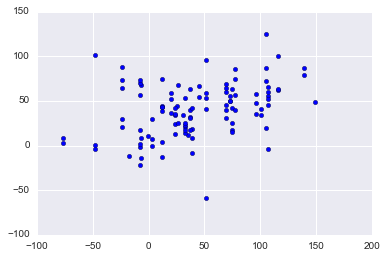

In [13]:
clf = linear_model.LinearRegression()
clf.fit(Xtrain, YLatTrain)
print("the r2 score for latitude is %f"%r2_score(YLatTest, clf.predict(Xtest)))
pyplot.scatter(YLatTest, clf.predict(Xtest))

the r2 score for longtitude is 0.166657


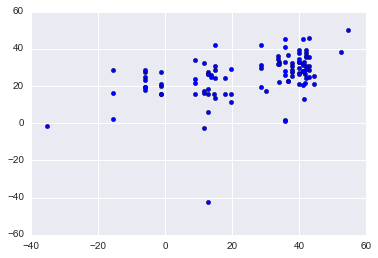

In [14]:
clf = linear_model.LinearRegression()
clf.fit(Xtrain, YLongTrain)
print("the r2 score for longtitude is %f"%r2_score(YLongTest, clf.predict(Xtest)))
pyplot.scatter(YLongTest, clf.predict(Xtest))

In [56]:
def invboxcox(y,ld):
   if ld == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(ld*y+1)/ld))

the r2 score for longtitude is 0.277382 after the transformation with lamba=1.516703
the r2 score for longtitude is 0.269794 after the transformation with lamba=1.716745
the r2 score for longtitude is 0.249363 after the transformation with lamba=4.297813
the r2 score for longtitude is 0.249363 after the transformation with lamba=4.297813


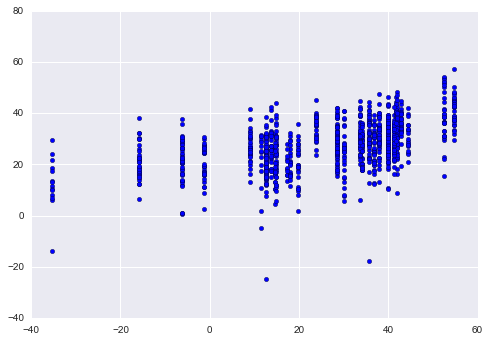

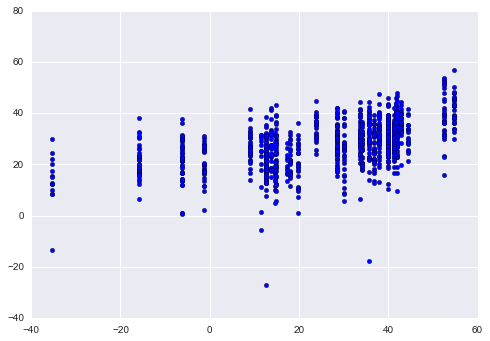

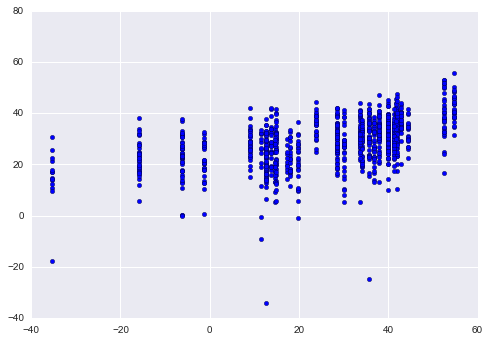

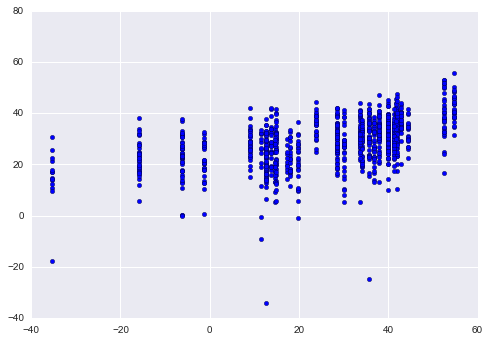

In [47]:
s = -np.min(YLong)
for (i, shift) in enumerate([s+0.1, s+1,s+100, s+100]):
    clf = linear_model.LinearRegression()
    YLong2, l = sp.stats.boxcox(YLongTrain+shift)
    clf.fit(X, YLong2)
    predicted = invboxcox(clf.predict(XTest), l)-shift
    print("the r2 score for longtitude is %f after the transformation with lamba=%f"%(r2_score(YLong, predicted), l))
    pyplot.figure(i)
    pyplot.scatter(Ylong, predicted)

the r2 score for longtitude is 0.334702 after the transformation with lamba=0.939379
the r2 score for longtitude is 0.335292 after the transformation with lamba=0.975080
the r2 score for longtitude is 0.335547 after the transformation with lamba=1.001989


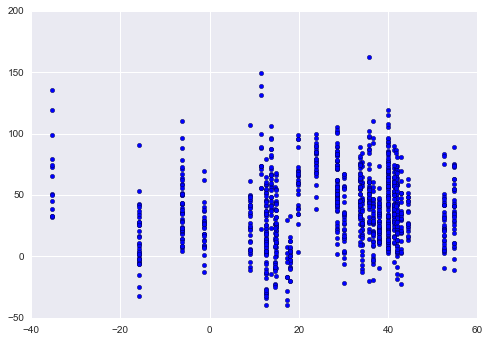

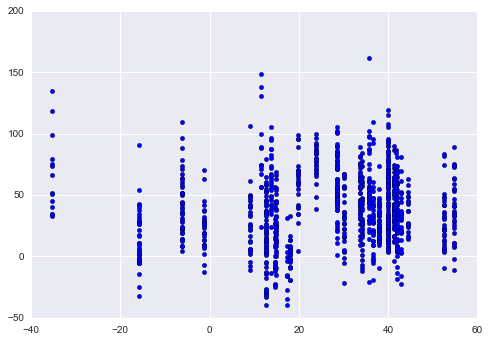

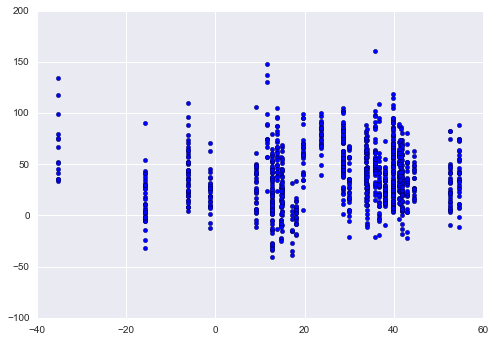

In [43]:
for (i, shift) in enumerate([-np.min(YLat)+1, -np.min(YLat)+10, -np.min(YLat)+100]):
    clf = linear_model.LinearRegression()
    YLat2, l = sp.stats.boxcox(YLat+shift)
    clf.fit(X, YLat2)
    predicted = invboxcox(clf.predict(X), l)-shift
    print("the r2 score for longtitude is %f after the transformation with lamba=%f"%(r2_score(YLat, predicted), l))
    pyplot.figure(i)
    pyplot.scatter(Ylong, predicted)

the r2 score for longtitude is 0.286832


(0.1, 1.0, 10.0)

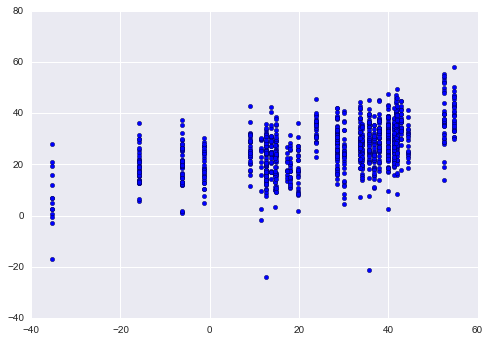

In [49]:
clf = linear_model.RidgeCV()
clf.fit(X, YLong)
print("the r2 score for longtitude is %f"%r2_score(YLong, clf.predict(X)))
pyplot.scatter(YLong, clf.predict(X))
clf.alphas

In [ ]:
np.min(X[:, i]-np.min(X[:,i])+1)

In [ ]:
import seaborn as sns; sns.set(color_codes=True)
from matplotlib import pyplot
clf = linear_model.LinearRegression()
Y = X[:,68]
for i in range(68):
    slop, intercept, rvalue, pvalue, std_err = sp.stats.linregress(X[:,i], Y)
    pyplot.scatter(y=X[:,i]*slop+intercept, x=Y)

In [6]:
credit_card_frame = pd.read_excel('data/creditcard.xls')


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
